# Lab 2: Cleaning and EDA of Goodreads 

**Univ.AI** <br>
**DS-1 Cohort 1** <br>

---

## Table of Contents 
* [Lab2: Cleaning and EDA on Goodreads](#Lab2:-Cleaning-and-EDA-on-Goodreads)
  * [Learning Goals](##Learning-Goals)
  * [Q1: Loading and Cleaning with Pandas](##Q1:-Loading-and-Cleaning-with-Pandas)
    * [1.1 Loading and Examining the data](###1.1-Loading-and-Examining-the-data)
    * [1.2 Dealing with Missing Values and Incorrect Datatypes](###1.2-Dealing-with-Missing-Values-and-Incorrect-Datatypes)
  * [Q2: Asking Questions](##Q2:-Asking-Questions)
  * [Q3: Parsing and Completing the Data Frame](##Q3:-Parsing-and-Completing-the-Data-Frame)
  * [Q4: EDA](##Q4:-EDA)
    * [4.1 Global Property Visualizations](###4.1-Global-Property-Visualizations)
    * [4.2 Grouped Property Visualizations](###4.2-Grouped-Property-Visualizations)
      * [4.2.1 Determining the Best Books](####4.2.1-Determining-the-Best-Books)
      * [4.2.2 Which genre is the most represented?](####4.2.2-Which-genre-is-the-most-represented?)
      * [4.2.3 Trends in Popularity of Genres](####4.2.3-Trends-in-Popularity-of-Genres)


## Learning Goals

By the end of this lab, you should be able to:

- Load and systematically address missing values, ancoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Create and interpret visualizations to explore the data set

In [20]:
#Import Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

## Q1: Loading and Cleaning with Pandas 

Continuing from Lab1, in this lab we'll clean and further parse the data.  We'll then do some exploratory data analysis to answer questions about these best books and popular genres.  

We have already parsed Goodreads for about 6000 books and saved this data as a CSV file `goodreads.csv`.

Go ahead and load the `goodreads.csv` file.

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```
----

### 1.1 Loading and Examining the data
Read the data from `goodreads.csv` into a dataframe. 

In [21]:
#Read the data into a dataframe
df = pd.read_csv("goodreads.csv",header=None,names=["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'])
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


Start by examining the dataframe to get an overall sense of the content. 

Look at the datatypes, the shape of the dataframe and find nulls is any.

In [22]:
#Start by check the column data types
df.dtypes
#your code here

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Was the data read correctly and values represented as we expected?

In [47]:
#Check the shape of the dataframe 
# df.review_count =  df.review_count.astype(int)
# del df[3643]

df = df[(df.review_count != 'None')]
# newdf.head()

# newdf.review_count =  newdf.review_count.astype(int)
# df.dropna()
df

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
...,...,...,...,...,...,...,...,...,...,...
5995,4.17,2226,0767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618,The River of Doubt
5996,3.99,775,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179,Shug
5997,3.78,540,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971,Flawed
5998,3.91,281,NaN,good_reads:book,https://www.goodreads.com/author/show/1201952....,2006.0,/genres/religion|/genres/islam|/genres/religio...,dir60/2750008.html,3083,Ø£Ø³Ø¹Ø¯ Ø§Ù Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ


Check to see if there are any missing values in the data frame.

**Hint: You can use the `isnull()` function**

In [54]:
#Try to locate where the missing values occur
df.isnull()
df[df.isna().any(axis=1)]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
16,3.92,38061,NaN,good_reads:book,https://www.goodreads.com/author/show/498072.A...,2003.0,/genres/fiction|/genres/romance|/genres/fantas...,dir01/18619684-the-time-traveler-s-wife.html,927254,The Time Traveler's Wife
49,3.85,11628,NaN,good_reads:book,https://www.goodreads.com/author/show/5152.Vla...,1955.0,/genres/classics|/genres/fiction|/genres/liter...,dir01/7604.Lolita.html,374886,Lolita
85,4.16,14968,NaN,good_reads:book,https://www.goodreads.com/author/show/137902.R...,2007.0,/genres/young-adult|/genres/teen|/genres/young...,dir01/18660669-vampire-academy.html,297022,"Vampire Academy (Vampire Academy, #1)"
116,3.92,8393,NaN,good_reads:book,https://www.goodreads.com/author/show/957894.A...,1942.0,/genres/classics|/genres/fiction|/genres/philo...,dir02/49552.The_Stranger.html,307566,The Stranger
156,4.03,3473,NaN,good_reads:book,https://www.goodreads.com/author/show/4785.Ale...,1843.0,/genres/classics|/genres/fiction|/genres/histo...,dir02/7190.The_Three_Musketeers.html,156968,The Three Musketeers
...,...,...,...,...,...,...,...,...,...,...
5972,4.19,1670,NaN,good_reads:book,https://www.goodreads.com/author/show/4586597....,2011.0,/genres/romance|/genres/romance|/genres/contem...,dir60/12351649-perfection.html,35197,"Perfection (Neighbor from Hell, #2)"
5976,4.23,1185,NaN,good_reads:book,https://www.goodreads.com/author/show/5160667....,2014.0,/genres/romance|/genres/science-fiction|/genre...,dir60/20504754-transcendence.html,4942,Transcendence
5977,4.03,218,NaN,good_reads:book,https://www.goodreads.com/author/show/5769580....,1987.0,/genres/fiction|/genres/novels|/genres/literat...,dir60/5948927.html,1607,Ø§ÙØªÙÙ
5991,4.20,650,NaN,good_reads:book,https://www.goodreads.com/author/show/1112683._,2009.0,/genres/novels|/genres/fiction|/genres/religio...,dir60/6976667.html,2899,Ø£ÙÙØ§Ø­ ÙØ¯Ø³Ø±


### 1.2 Dealing with Missing Values and Incorrect Datatypes
The next step is to correct the datatypes and deal with nulls accordingly.

How should we interpret 'missing' or 'invalid' values in the data? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (Is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [56]:
#Treat the missing or invalid values in your dataframe
df = df.dropna()
df
#your code here

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
...,...,...,...,...,...,...,...,...,...,...
5994,4.37,28,0393062260,good_reads:book,https://www.goodreads.com/author/show/62157.Ro...,2007.0,/genres/poetry|/genres/religion|/genres/christ...,dir60/1251125.The_Book_of_Psalms.html,242,The Book of Psalms
5995,4.17,2226,0767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618,The River of Doubt
5996,3.99,775,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179,Shug
5997,3.78,540,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971,Flawed


Once the missing values are taken care of, you can convert the dataframe to the correct datatypes. If the type conversion fails, we now know we have further problems

In [59]:
#Convert datatypes 
df.dtypes

df.review_count = df.review_count.astype(int)
df.rating_count = df.rating_count.astype(int)
df.year = df.year.astype(int)
#your code here

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
...,...,...,...,...,...,...,...,...,...,...
5994,4.37,28,0393062260,good_reads:book,https://www.goodreads.com/author/show/62157.Ro...,2007,/genres/poetry|/genres/religion|/genres/christ...,dir60/1251125.The_Book_of_Psalms.html,242,The Book of Psalms
5995,4.17,2226,0767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618,The River of Doubt
5996,3.99,775,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179,Shug
5997,3.78,540,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971,Flawed


In [60]:
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

## Q2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.

_your answer here_

In [69]:
df[ ["name", "rating", "review_count", "rating_count"]].sort_values(by = ["rating_count"], ascending=False)

,name,rating,review_count,rating_count
0,"The Hunger Games (The Hunger Games, #1)",4.40,136455,2958974
950,Harry Potter and the Sorcerer's Stone (Harry P...,4.38,43022,2816611
2,"Twilight (Twilight, #1)",3.56,85746,2579564
3,To Kill a Mockingbird,4.23,47906,2078123
58,The Great Gatsby,3.84,38222,1803088
...,...,...,...,...
3712,Blade Heart,4.93,7,15
5431,Leadership,4.53,5,15
5548,Meditation on Space-Time,3.60,6,15
3256,Not Open,4.73,2,11


---

##  Q3: Parsing and Completing the Data Frame 

We will need author name and the genre name to proceed! 

To get the `author` column, parse the `author_url` column to extract only the name of the author and put it in your new column `author`. 

Similarly, to get the `genres` column,parse the `genre_urls` column. Since there are several genres associated with a row, the `genres` column should be all the genre names as a string separated by '|'. <br>
For example, the genres column should look something like this for each row:
`young-adult|science-fiction|dystopia|fantasy|`



In [97]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above

# from bs4 import BeautifulSoup
#   page = request.get(url)
#   # soup = 
#   page.text
# #your code here

def getAutherName(url):
  try:
    return url.split('.')[-1].replace("_", " ")
  except:
    return ''
df['author'] = df['author_url'].apply(getAutherName)
df

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J K Rowling
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie Meyer
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper Lee
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane Austen
...,...,...,...,...,...,...,...,...,...,...,...
5994,4.37,28,0393062260,good_reads:book,https://www.goodreads.com/author/show/62157.Ro...,2007,/genres/poetry|/genres/religion|/genres/christ...,dir60/1251125.The_Book_of_Psalms.html,242,The Book of Psalms,Robert Alter
5995,4.17,2226,0767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618,The River of Doubt,Candice Millard
5996,3.99,775,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179,Shug,Jenny Han
5997,3.78,540,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971,Flawed,Kate Avelynn


In [72]:
#Apply the above function to the 'author_url' column 
#Hint: Use the '.map' function


#your code here

In [ ]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above

#your code here

In [ ]:
#Apply the above function to the 'genre_url' column 
#Hint: Use the '.map' function


#your code here

---

## Q4: EDA 

###4.1 Global Property Visualizations


Get to know the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. 

Do you find anything interesting or strange? 

Choose some columns to generate histograms. If your histograms appear strange or counter-intuitive, make appropriate adjustments in the data and re-visualize.

In [ ]:
#Generate histograms of any column you like


#your code here

Try plotting a histogram of the number of books in a year from the dataframe, change the axis to log and observe the advantage of having a log scale!

In [ ]:
#Plot the histogram to indicate the number of books in a year with a linear and log scale.


#your code here

It appears that some books were written in negative years!  Print out the observations that correspond to negative years.  What do you notice about these books?  

In [ ]:
#your code here 



### 4.2 Grouped Property Visualizations

This is where you could attempt to answer the questions you framed in Part 2!
Just to get you started, let's start with the following two questions - 

Q1. What is the best book every year? <br>
Q2. What genre is the most represented?
Q3. Show the trends in popularity of all genres

Other than these, go ahead and do your own visualizations and let us know if you found anything interesting!

#### 4.2.1 Determining the Best Books 

Use .groupby to divide the dataframe into subsets by each year, and find the book with maximum rating.

You can have different definition of the "best book" other than just a rating, for example, you could consider the rating and the number of users who have rated the book.

In [ ]:
#Using .groupby, we can divide the dataframe into subsets by the values of 'year'.


#your code here

#### 4.2.2 Which genre is the most represented?

Find the genre with the most number of books in it.

Before we answer this question, we need to find the distinct genres in the dataframe. 

In [ ]:
#Get the unique genres contained in the dataframe.


#your code here

Now we need to transform this dataframe into something we can use for visualizations.

One easy way to transform this data is to add a new column to the data frame for each genre. This way if a particular author falls in to a genre, it will have a '1' and the rest will be '0'.

In [ ]:
#Add a column for each genre

#your code here

Now we can answer the question of which is the most represented genre.

In [ ]:
genreslist = ['genre:'+g for g in genres]
dfg = df[genreslist].sum() 

In [ ]:
#Make a bar plot to answer the question



#### 4.2.3 Trends in Popularity of Genres 

Let's look at the most frequent genres by years. We create a visualization called a  *Small Multiples* plot, which shows the yearly histograms for 
multiple variables. 

Let's limit the visualization to the genres that contain more than 550 books.

In [ ]:
genres_wanted=dfg.index[dfg.values > 550]
print(genres_wanted.shape)
genres_wanted

(30,)


Index(['genre:adult', 'genre:adult-fiction', 'genre:adventure', 'genre:book-club', 'genre:chick-lit', 'genre:childrens', 'genre:classics', 'genre:contemporary', 'genre:cultural', 'genre:european-literature', 'genre:fantasy', 'genre:fiction', 'genre:historical-fiction', 'genre:humor', 'genre:literature', 'genre:magic', 'genre:mystery', 'genre:non-fiction', 'genre:novels', 'genre:paranormal', 'genre:paranormal-romance', 'genre:romance', 'genre:science-fiction', 'genre:science-fiction-fantasy',
       'genre:supernatural', 'genre:teen', 'genre:thriller', 'genre:urban-fantasy', 'genre:womens-fiction', 'genre:young-adult'],
      dtype='object')

For each genre, we collect the years for which this genre's column is '1' and make a set of histograms. We fix our bins and plot the histograms against a grey histogram for the general increase in books in our dataset per year.

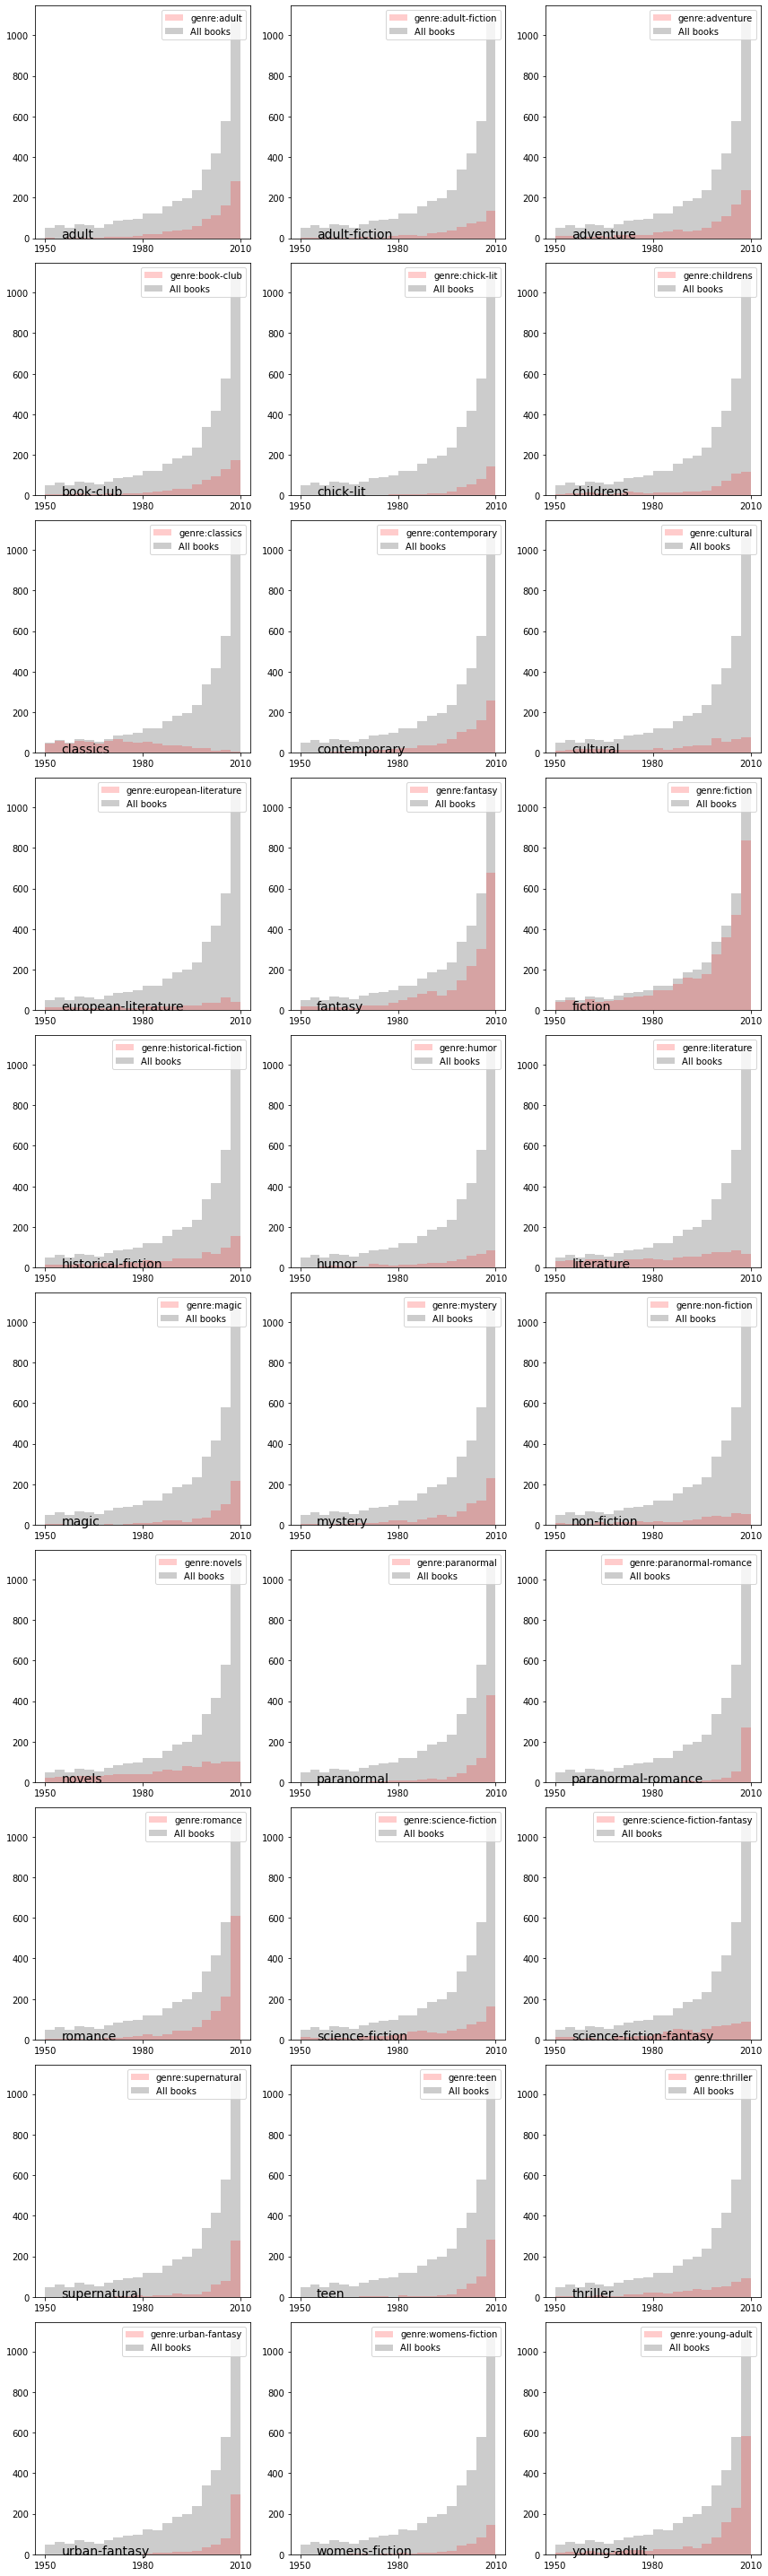

In [ ]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(12, 40), tight_layout=True)
bins = np.arange(1950, 2013, 3)
for ax, genre in zip(axes.ravel(), genres_wanted):
    # your code here

    

##### What can you conclude from the above visualizations?

Pick two or three genres and describe how the popularity of these genres fluctuates with time.  

_your answer here_